Load in basic libraries.

In [3]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.pyplot import *
import queue, pyaudio 
from scipy import signal
from numpy import *
%matplotlib inline

## Explore the python fft function

In [ ]:
# Show the help for the fft function
np.fft.fft?

<Figure size 432x288 with 0 Axes>

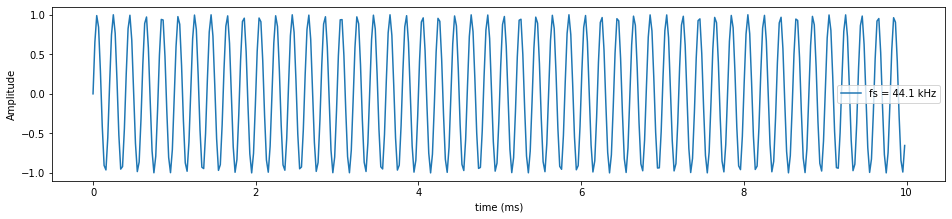

<Figure size 432x288 with 0 Axes>

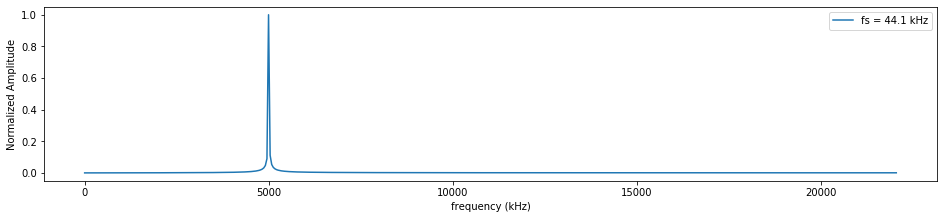

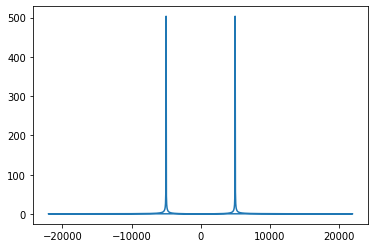

In [5]:
from __future__ import division
# Create sinusoidal signal
t = np.r_[0:1:(1/44100)]
sig = np.sin(2*np.pi*5000*t)

# Perform FFT and create frequency axis
sigfft = np.fft.fft(sig, 1024 )
# freq = np.r_[0:1024] # The incorrect frequency scale
freq = np.r_[0:1024]*(44100/1024) # The correct frequency scale

# the code below is interesting, but it is better to create your own frequency axis.
# freq = np.fft.fftfreq(1024, 1/44100)

# Plot the signal and its FFT
# Plot the signal 
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))
# stem plot
# plt.stem(t[0:441]*1000,sig[0:441],use_line_collection=True)
# continuous plot
plt.plot(t[0:441]*1000,sig[0:441])
plt.legend(("fs = 44.1 kHz",""))
plt.xlabel("time (ms)")
plt.ylabel("Amplitude")

# Plot the FFT of the signal
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))
## Original frequency range
# plt.plot(freq,abs(sigfft)/np.max(abs(sigfft)))

# New frequency range
plt.plot(freq[0:513],abs(sigfft[0:513])/np.max(abs(sigfft[0:513])))
plt.xlabel("frequency (kHz)")
plt.ylabel("Normalized Amplitude")
plt.legend(("fs = 44.1 kHz",""))

# Using Numpy fftfreq function
plt.figure()
npFreq = np.fft.fftfreq(1024, 1/44100)
plt.plot(npFreq,abs(sigfft))


## Things to explain and change
### 1. In the example above we used a stem plot. Please comment this out and uncomment the continuous plot. 
Refer to the code above
### 2. Explain briefly why the continuous plot is easier to interpret - despite the fact it is sampled and a stem plot should be ok.
Because the sampling rate is large enough to permit a discrete sequence of samples to capture all the information from a continuous-time signal. (i.e., we can reconstruct the original signal from the samples).
### 3. Explain why 10 ms corresponds to 441 samples
The sampling rate is 44100 samples per seconds, therefore, 10ms correpsonds to 10/1000*44100 = 441 samples. 
### 4. The FFT plot has the wrong frequency axis. Please fix it by modifying the code above.
Refer to the code above
### 5. The FFT plot of a real signal is redundant - explain.
That is because the DFT of a real signal is conjugate symmetric.
### 6. Modify the FFT plot so that we only show the frequencies up to the Nyquist frequency.
Refer to the code above
### 7. Numpy provides a FFT frequency function. Comment your frequency axis code and uncomment the freq axis defined using the numpy fftfreq function. Plot the FFT using the numpy freq axis. 
Refer to the code
### 8. Explain very, very carefully what happened with the FFT plot using the numpy fftfreq function. 
The numpy fftfreq function returns the frequency of fast Fourier transform's samples. The returned frequency ranges from -22050 Hz to 22050 Hz, which explains why we can see the freqency axis has both positive and negative sides. Meanwhile, the FFT plot has two symmetrical peaks, located at -5 kHz and 5 kHz, respectively.

## Define the play_audio function

In [8]:
def play_audio( Q, p, fs , dev=None):
    # play_audio plays audio with sampling rate = fs
    # Q - A queue object from which to play
    # p   - pyAudio object
    # fs  - sampling rate
    # dev - device number
    
    # Example:
    # fs = 44100
    # p = pyaudio.PyAudio() #instantiate PyAudio
    # Q = Queue.queue()
    # Q.put(data)
    # Q.put("EOT") # when function gets EOT it will quit
    # play_audio( Q, p, fs,1 ) # play audio
    # p.terminate() # terminate pyAudio
    
    # open output stream
    ostream = p.open(format=pyaudio.paFloat32, channels=1, rate=int(fs),output=True,output_device_index=dev)
    # play audio
    while (1):
        data = Q.get()
        if data is "EOT" :
            break
        try:
            ostream.write( data.astype(np.float32).tostring() )
        except:
            break

## Sample Sinusoidal Signals
### Case 1: 5 kHz sampled with 72 kHz - this will be our reference

([<matplotlib.axis.XTick at 0x10212d850>,
 <a list of 11 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

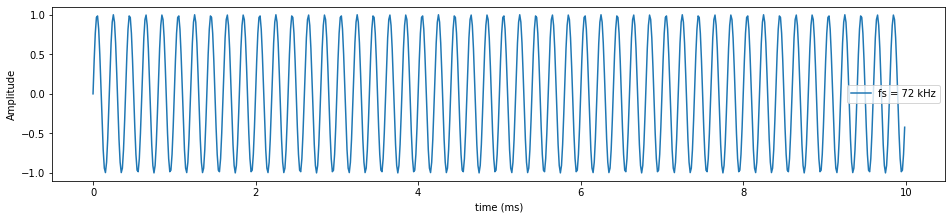

<Figure size 432x288 with 0 Axes>

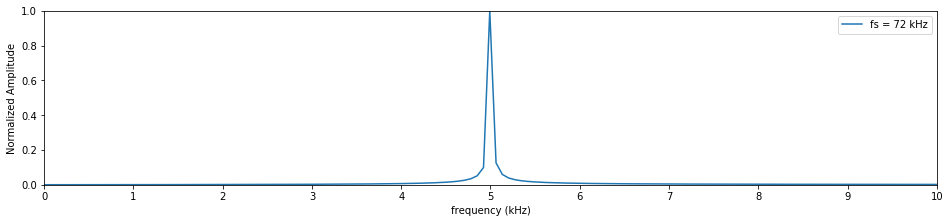

In [9]:
from __future__ import division
fs = [72000, 24000, 12000, 8000, 6000]

# Case 1: 5 kHz sampled with 72 kHz
# Create signal
t1 = np.r_[0:2:(1/fs[0])]
sig1 = np.sin(2*np.pi*5000*t1)

# Perform FFT and create frequency axis
sig1fft = np.fft.fft(sig1, 1024 )
freq1 = np.r_[0:1024]*(fs[0]/1024)

# Plot the signal 
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))
plt.plot(t1[0:720]*1000,sig1[0:720])
plt.legend(("fs = 72 kHz",""))
plt.xlabel("time (ms)")
plt.ylabel("Amplitude")

# Plot the FFT of the signal
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))
plt.plot(freq1[0:513]/1000,abs(sig1fft[0:513])/np.max(abs(sig1fft[0:513])))
plt.xlabel("frequency (kHz)")
plt.ylabel("Normalized Amplitude")
plt.legend(("fs = 72 kHz",""))
plt.axis([0,10,0,1])
plt.xticks(np.arange(0,10+1,1))

## Play the reference signal

In [10]:
Qout = queue.Queue()
Qout.put( sig1 );
Qout.put( "EOT" );
p = pyaudio.PyAudio()
play_audio(Qout,p,fs[0])
p.terminate()

## Repeat with different sample rates and compare to the reference
### Case 2: 5 kHz sample with 24 kHz

([<matplotlib.axis.XTick at 0x11f9358d0>,
 <a list of 11 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

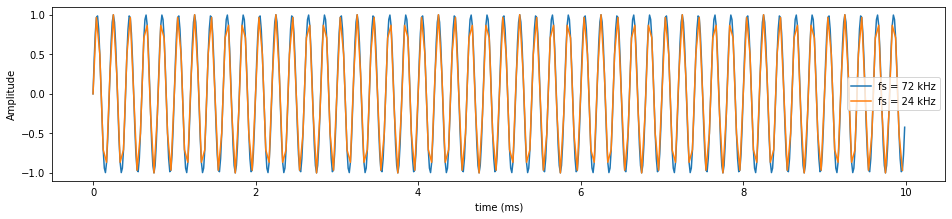

<Figure size 432x288 with 0 Axes>

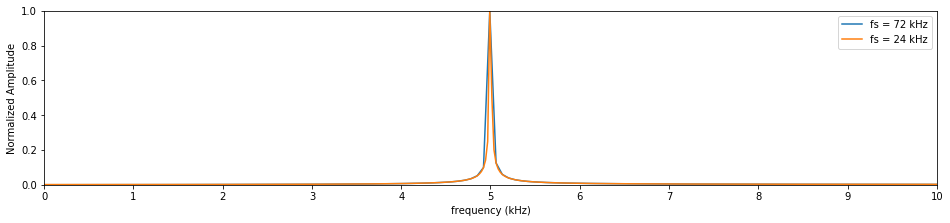

In [11]:
from __future__ import division
fs = [72000, 24000, 12000, 8000, 6000]

# Case 1: 5 kHz sampled with 24 kHz
# Create signal
t2 = np.r_[0:2:(1/fs[1])]
sig2 = np.sin(2*np.pi*5000*t2)

# Perform FFT and create frequency axis
sig2fft = np.fft.fft(sig2, 1024 )
freq2 = np.r_[0:1024]*(fs[1]/1024)

# Plot new signal and compare with the reference
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))

plt.plot(t1[0:720]*1000,sig1[0:720])
plt.plot(t2[0:240]*1000,sig2[0:240])
plt.legend(("fs = 72 kHz","fs = 24 kHz"))
plt.xlabel("time (ms)")
plt.ylabel("Amplitude")

# Plot FFT of new signal and compare with the reference
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))
plt.plot(freq1[0:513]/1000,abs(sig1fft[0:513])/np.max(abs(sig1fft[0:513])))
plt.plot(freq2[0:513]/1000,abs(sig2fft[0:513])/np.max(abs(sig2fft[0:513])))
plt.xlabel("frequency (kHz)")
plt.ylabel("Normalized Amplitude")
plt.legend(("fs = 72 kHz","fs = 24 kHz"))
plt.axis([0,10,0,1])
plt.xticks(np.arange(0,10+1,1))


## Play the new signal and the reference signal

In [19]:
# Reference
Qout = queue.Queue()
Qout.put( sig1 );
Qout.put( "EOT" );
p = pyaudio.PyAudio()
play_audio(Qout,p,fs[0])
p.terminate()

In [20]:
# New 
Qout = queue.Queue()
Qout.put( sig2 );
Qout.put( "EOT" );
p = pyaudio.PyAudio()
play_audio(Qout,p,fs[1])
p.terminate()

# Your Turn
## Case 3:  5 kHz sampled at 12 kHz
### Add your code below similar to case 2. 
#### Generate the new signal, compute its FFT, plot the new signal with the reference signal, plot the fft of the signal and compare with the reference signal.
#### Play both the reference signal and the new signal. Provide a brief written explanation for what you observe.
----
As the sampling frequency 12 kHz is larger than Nyquist rate (5 x 2 = 10 kHz), we can successfully reconstruct the original signal from the samples. And the FFT plot shows that the peak of the new signal is 5 kHz, which is same as the reference signal. By playing the audio signal, there is almost no difference between those two signals.

----

([<matplotlib.axis.XTick at 0x105fdef0>,
 <a list of 11 Text xticklabel objects>)

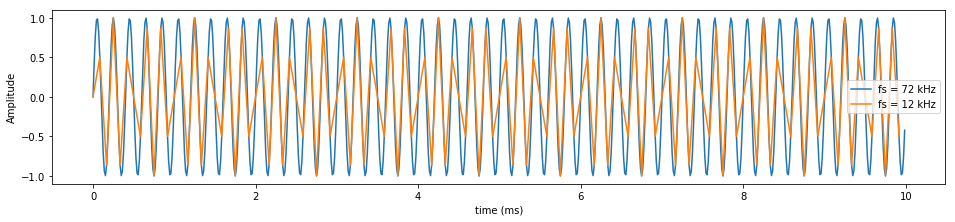

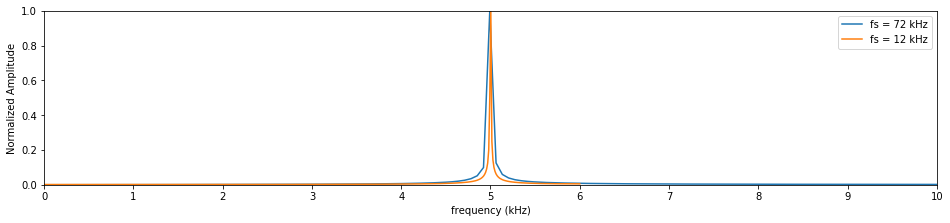

In [21]:
from __future__ import division
fs = [72000, 24000, 12000, 8000, 6000]

# Case 3: 5 kHz sampled with 12 kHz
# Create signal
t3 = np.r_[0:2:(1/fs[2])]
sig3 = np.sin(2*np.pi*5000*t3)

# Perform FFT and create frequency axis
sig3fft = np.fft.fft(sig3, 1024 )
freq3 = np.r_[0:1024]*(fs[2]/1024)

# Plot new signal and compare with the reference
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))

plt.plot(t1[0:720]*1000,sig1[0:720])
plt.plot(t3[0:120]*1000,sig3[0:120])
plt.legend(("fs = 72 kHz","fs = 12 kHz"))
plt.xlabel("time (ms)")
plt.ylabel("Amplitude")

# Plot FFT of new signal and compare with the reference
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))
plt.plot(freq1[0:513]/1000,abs(sig1fft[0:513])/np.max(abs(sig1fft[0:513])))
plt.plot(freq3[0:513]/1000,abs(sig3fft[0:513])/np.max(abs(sig3fft[0:513])))
plt.xlabel("frequency (kHz)")
plt.ylabel("Normalized Amplitude")
plt.legend(("fs = 72 kHz","fs = 12 kHz"))
plt.axis([0,10,0,1])
plt.xticks(np.arange(0,10+1,1))

## Play the new signal and the reference signal

In [22]:
# Reference
Qout = queue.Queue()
Qout.put( sig1 );
Qout.put( "EOT" );
p = pyaudio.PyAudio()
play_audio(Qout,p,fs[0])
p.terminate()

In [23]:
# New 
Qout = queue.Queue()
Qout.put( sig3 );
Qout.put( "EOT" );
p = pyaudio.PyAudio()
play_audio(Qout,p,fs[2])
p.terminate()

## Case 4:  5 kHz sampled at 8 kHz
### Add your code below similar to case 2. 
#### Generate the new signal, compute its FFT, plot the new signal with the reference signal, plot the fft of the signal and compare with the reference signal.
#### Play both the reference signal and the new signal. Provide a brief written explanation for what you observe.
----
As the sampling frequency 8 kHz is less than Nyquist rate, we cannot successfully reconstruct the original signal from the samples. (i.e., Aliasing happens). The FFT plot shows that the peak of the new signal is (-5+8)=3 kHz, which is differnt with the reference signal. Two signals also have a difference in tone, with the new one having a lower tone to the reference.

----

([<matplotlib.axis.XTick at 0x102c2080>,
 <a list of 11 Text xticklabel objects>)

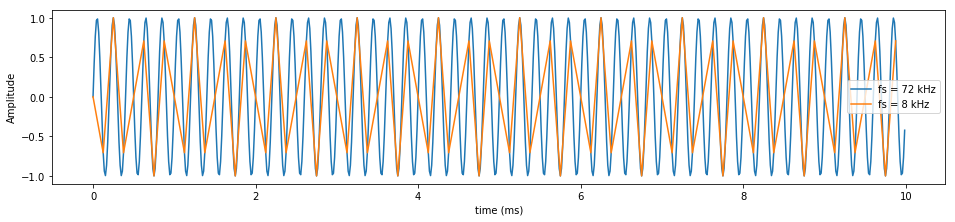

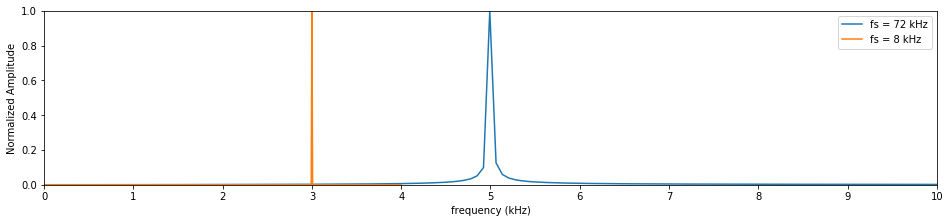

In [24]:
from __future__ import division
fs = [72000, 24000, 12000, 8000, 6000]

# Case 4: 5 kHz sampled with 8 kHz
# Create signal
t4 = np.r_[0:2:(1/fs[3])]
sig4 = np.sin(2*np.pi*5000*t4)

# Perform FFT and create frequency axis
sig4fft = np.fft.fft(sig4, 1024 )
freq4 = np.r_[0:1024]*(fs[3]/1024)

# Plot new signal and compare with the reference
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))

plt.plot(t1[0:720]*1000,sig1[0:720])
plt.plot(t4[0:80]*1000,sig4[0:80])
plt.legend(("fs = 72 kHz","fs = 8 kHz"))
plt.xlabel("time (ms)")
plt.ylabel("Amplitude")

# Plot FFT of new signal and compare with the reference
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))
plt.plot(freq1[0:513]/1000,abs(sig1fft[0:513])/np.max(abs(sig1fft[0:513])))
plt.plot(freq4[0:513]/1000,abs(sig4fft[0:513])/np.max(abs(sig4fft[0:513])))
plt.xlabel("frequency (kHz)")
plt.ylabel("Normalized Amplitude")
plt.legend(("fs = 72 kHz","fs = 8 kHz"))
plt.axis([0,10,0,1])
plt.xticks(np.arange(0,10+1,1))

## Play the new signal and the reference signal

In [25]:
# Reference
Qout = queue.Queue()
Qout.put( sig1 );
Qout.put( "EOT" );
p = pyaudio.PyAudio()
play_audio(Qout,p,fs[0])
p.terminate()

In [27]:
# New 
Qout = queue.Queue()
Qout.put( sig4 );
Qout.put( "EOT" );
p = pyaudio.PyAudio()
play_audio(Qout,p,fs[3])
p.terminate()

## Case 5:  5 kHz sampled at 6 kHz
### Add your code below similar to case 2. 
#### Generate the new signal, compute its FFT, plot the new signal with the reference signal, plot the fft of the signal and compare with the reference signal.
#### Play both the reference signal and the new signal. Provide a brief written explanation for what you observe.
----
As the sampling frequency 6 kHz is less than Nyquist rate, we cannot successfully reconstruct the original signal from the samples. (i.e., Aliasing happens). The FFT plot shows that the peak of the new signal is (-5+6)=3 kHz, which is differnt with the reference signal. Two signals also have a difference in tone, with the new one having a much lower tone to the reference. 

----

([<matplotlib.axis.XTick at 0x110beb70>,
 <a list of 11 Text xticklabel objects>)

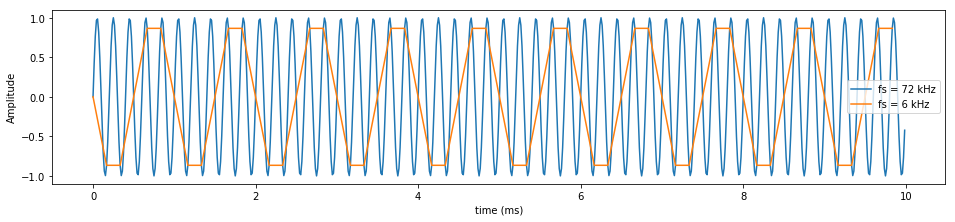

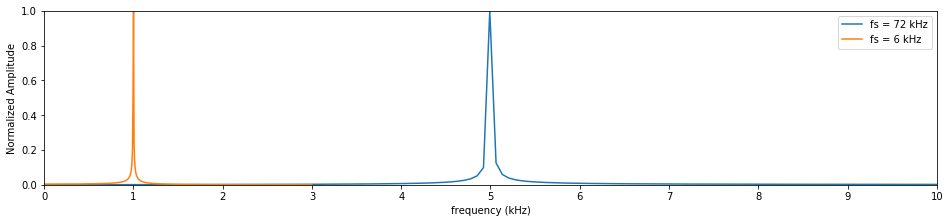

In [28]:
from __future__ import division
fs = [72000, 24000, 12000, 8000, 6000]

# Case 5: 5 kHz sampled with 6 kHz
# Create signal
t5 = np.r_[0:2:(1/fs[4])]
sig5 = np.sin(2*np.pi*5000*t5)

# Perform FFT and create frequency axis
sig5fft = np.fft.fft(sig5, 1024 )
freq5 = np.r_[0:1024]*(fs[4]/1024)

# Plot new signal and compare with the reference
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))

plt.plot(t1[0:720]*1000,sig1[0:720])
plt.plot(t5[0:60]*1000,sig5[0:60])
plt.legend(("fs = 72 kHz","fs = 6 kHz"))
plt.xlabel("time (ms)")
plt.ylabel("Amplitude")

# Plot FFT of new signal and compare with the reference
plt.figure()
width, height = plt.figaspect(0.2)
fig = plt.figure(figsize=(width,height))
plt.plot(freq1[0:513]/1000,abs(sig1fft[0:513])/np.max(abs(sig1fft[0:513])))
plt.plot(freq5[0:513]/1000,abs(sig5fft[0:513])/np.max(abs(sig5fft[0:513])))
plt.xlabel("frequency (kHz)")
plt.ylabel("Normalized Amplitude")
plt.legend(("fs = 72 kHz","fs = 6 kHz"))
plt.axis([0,10,0,1])
plt.xticks(np.arange(0,10+1,1))

## Play the new signal and the reference signal

In [29]:
# Reference
Qout = queue.Queue()
Qout.put( sig1 );
Qout.put( "EOT" );
p = pyaudio.PyAudio()
play_audio(Qout,p,fs[0])
p.terminate()

In [30]:
# New 
Qout = queue.Queue()
Qout.put( sig5 );
Qout.put( "EOT" );
p = pyaudio.PyAudio()
play_audio(Qout,p,fs[4])
p.terminate()

# 2D FFT Exercise

In [13]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
import matplotlib.image as mpimg
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

## Display Image

(387, 387)


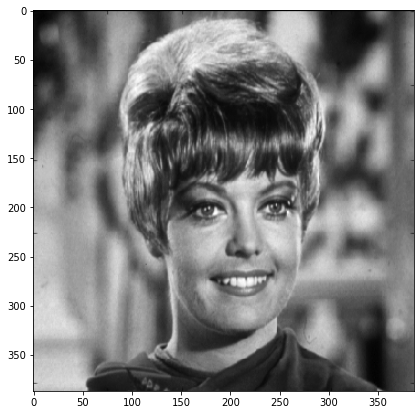

In [14]:
im = mpimg.imread('zelda.tif')
im = im[:,:,1]
f = plt.figure()
plt.imshow(im,cmap='gray')
print (im.shape)

## Compare the Magnitude and Phase Spectrum of an Image
Write python code to compute the 2D FFT of an image using np.fft.fft2(). For the magnitude spectrum, please compute the log spectrum (20 x log(abs())). Please make sure you apply the np.fft.fftshift() function.

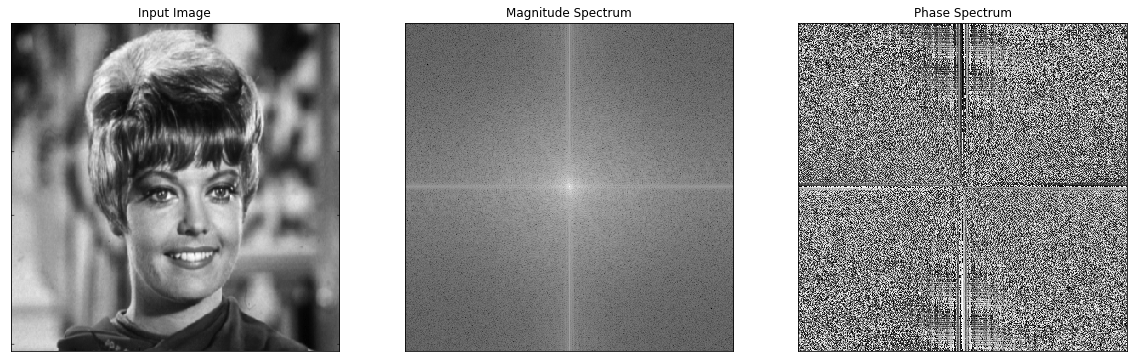

In [15]:
# Put your code here
im_fft = np.fft.fft2(im)
fshift = np.fft.fftshift(im_fft)
magnitude_spectrum = 20*np.log(np.abs(fshift))
phase_spectrum = np.angle(fshift)

# Make the plot
plt.subplot(131),plt.imshow(im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(phase_spectrum, cmap = 'gray')
plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])
plt.show() 

Which spectrum seems to contain more information? Put your answer here.

The phase spectrum seems more complicated. 

# JPEG DCT Demo
## Define 2D DCT and IDCT

The DTC2 Transform is defined as follows:
$$ X[k] = 2\sum_{n=0}^{N-1}x[n]\cos\left(\frac{\pi k(2n+1)}{2N}\right),\ \ 0\le k \le N-1$$
$$ x[n] = \frac{1}{N}\sum_{k=0}^{N-1}\beta[k]X[k]\cos\left(\frac{\pi k (2n+1)}{2N}\right),\ \ 0 \le n \le N-1 $$
where $\beta[k]$ is a weighting function give by:
$$\beta[k] = \left\{ \begin{array}{c}
                     \frac{1}{2}, & \ \ k=0\\
                     1, & \ \ 1 \le k \le N-1\\
                     \end{array} \right. $$


In [16]:
def dct2(a):
    return scipy.fft.dct( scipy.fft.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fft.idct( scipy.fft.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

## Perform a blockwise DCT

In [21]:
imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

## Extract 8x8 block and look at its DCT coefficients

Text(0.5, 1.0, 'An 8x8 DCT block')

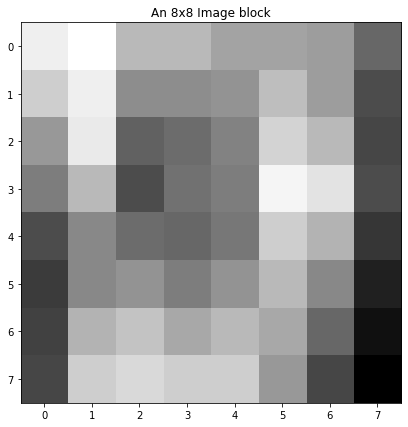

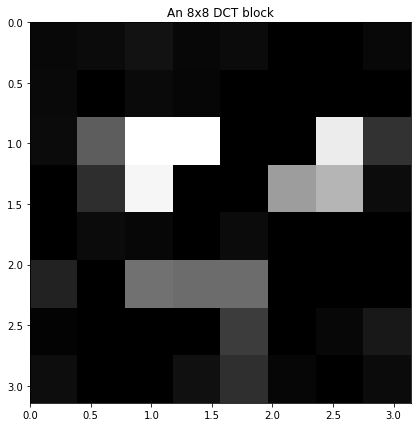

In [22]:
pos = 150

# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 8x8 DCT block")

## Display all DCT Blocks

Text(0.5, 1.0, '8x8 DCTs of the image')

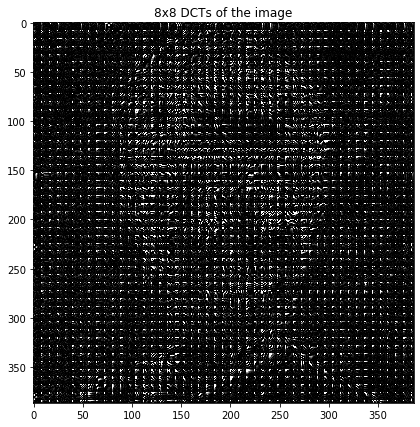

In [39]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

## Threshold DCT Coefficients

Keeping only 6.159486% of the DCT coefficients


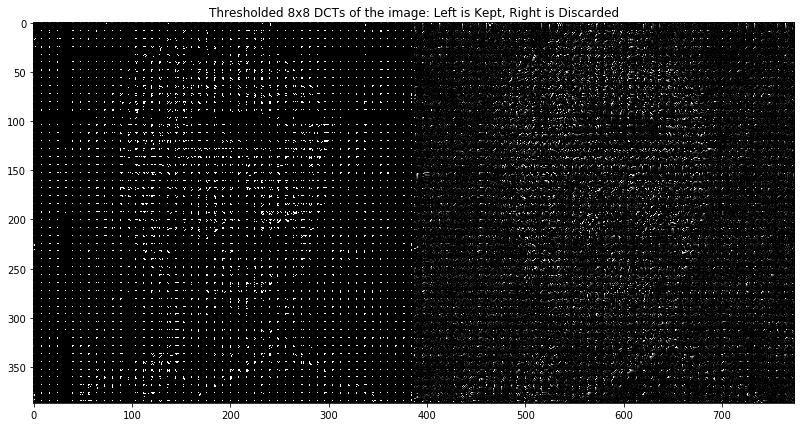

In [44]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))
dct_thresh_discard = dct * (abs(dct) < (thresh*np.max(dct)))

plt.figure()
plt.imshow( np.hstack( (dct_thresh, dct_thresh_discard) ) ,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image: Left is Kept, Right is Discarded")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

## Compare DCT Compressed Image with Original

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

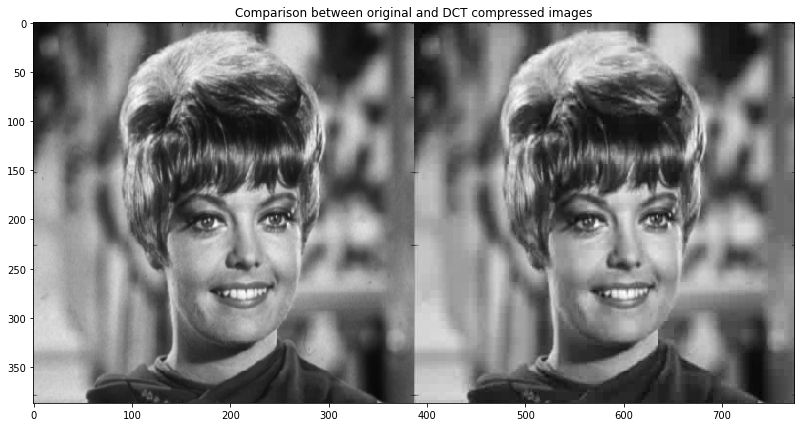

In [59]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )

## Compare with DFT Compressed Image

Use the np.fft.fft2 to replace the dct2 function and repeat the above to compare the dft2 with the dct2 in terms of compression.

Keeping only 6.159486% of the DCT coefficients
Keeping only 8.911056% of the DFT coefficients


Text(0.5, 1.0, 'Comparison between original, DCT compressed and DFT compressed images')

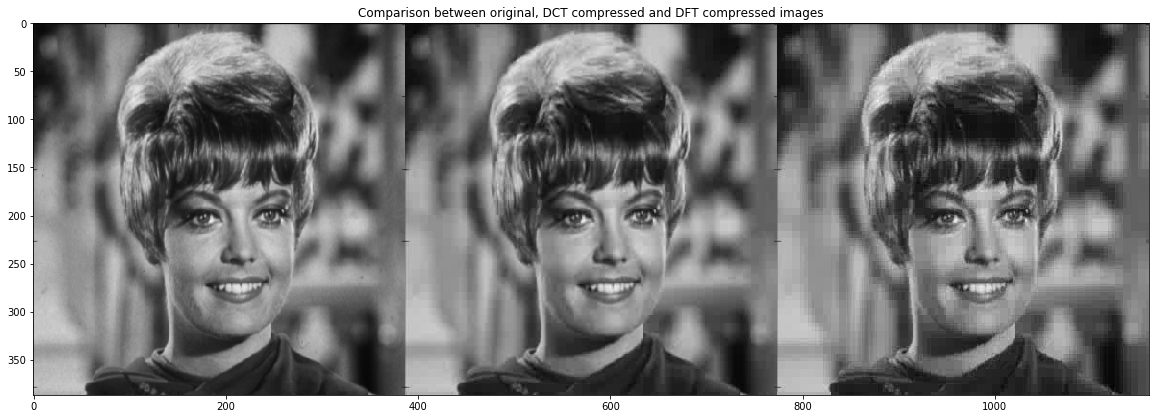

In [63]:
dft = zeros(imsize,dtype='complex');
im_dft = zeros(imsize,dtype='complex');

# 8x8 DFT
# Please add your code here
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dft[i:(i+8),j:(j+8)] = np.fft.fft2( im[i:(i+8),j:(j+8)] )

# Apply a Threshold
thresh = 0.013
dft_thresh = dft * (abs(dft) > (thresh*np.max(abs(dft))))


percent_nonzeros_dft = np.sum( dft_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))
print ("Keeping only %f%% of the DFT coefficients" % (percent_nonzeros_dft*100.0))

# 8x8 iDFT
# Please add your code here
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dft[i:(i+8),j:(j+8)] = np.fft.ifft2( dft_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (im, im_dct, abs(im_dft)) ) ,cmap='gray')
plt.title("Comparison between original, DCT compressed and DFT compressed images" )

# FFT DEMO
Please run through the demo below. There is no particular coding work required, but please answer the question at the end.

## Forward DFT:
$$X[k]=\sum_{n=0}^{N-1}x[n]W_N^{kn}$$ 
Recall from class that the DFT can be implemented as a matrix-vector multiplication. We know that the complexity of dense matrix-vector multiplication is  $\mathcal{O}(N^2)$ .

We can write this as  $\mathbf{X}=\mathbf{D}\mathbf{x}$ , where  $(\mathbf{D})kn=W_N^{kn}$.

In [45]:
def W_N(N,k,n):
    return exp(-1j * 2 * np.pi * k * n / N)

def mydft(x):
    """Returns the 1D DFT of x using matrix-vector multiplication"""
    N = x.shape[0]
    n_idx = np.arange(N)
    k_idx = n_idx[:, None]
    return np.dot(W_N(N,k_idx,n_idx), x)

L = 1024
x = np.random.random(L) + 1j * np.random.random(L)

res = np.allclose(mydft(x), np.fft.fft(x))
if res:
    print ('DFT matrix matches built-in FFT')
else:
    print ('Error in DFT matrix multiplication')

%timeit mydft(x)
%timeit np.fft.fft(x)

DFT matrix matches built-in FFT
33.4 ms ± 230 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
14.5 µs ± 73.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Symmetry in the DFT
Recall the periodicity/symmetry of the DFT:
$$ \begin{array}{ll}
   X[k+mN] & = &  \sum_{n=0}^{N-1}x[n]W_N^{(k+mN)n} \\
           & = & \sum_{n=0}^{N-1}x[n]W_N^{kn}\\
           & = & X[k]\\
   \end{array} $$     
where we have used the periodicity of $W_N$.

We can use this symmetry to split the DTF into two smaller DFTs:
$$ \begin{array}{ll}
    X[k] & = &  \sum_{n=0}^{N-1}x[n]W_N^{kn}\\
         & = & \sum_{m=0}^{N/2-1}x[2m]W_N^{k(2m)} + \sum_{m=0}^{N/2-1}x[2m+1]W_N^{k(2m+1)}\\
   \end{array} $$

The FFT uses this property to decompose the length-N DFT into two length-N/2 DFTs, repeadetly. This amounts to a complexity of $\mathcal{O}(N\log N)$.
   

In [46]:
def myfft(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return mydft(x)
    else:
        X_even = myfft(x[::2])
        X_odd = myfft(x[1::2])
        n_idx = np.arange(N)
        factor = W_N(N,n_idx, 1)
        return np.concatenate([X_even + factor[:N // 2] * X_odd,
          
                               X_even + factor[N // 2:] * X_odd])
    
res = np.allclose(myfft(x), np.fft.fft(x))
if res:
    print ('Our FFT matches built-in FFT')
else:
    print ('Error in recursive FFT implementation')
    
    
%timeit mydft(x)
%timeit myfft(x)
%timeit np.fft.fft(x)

Our FFT matches built-in FFT
34.8 ms ± 499 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2 ms ± 55 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.5 µs ± 52.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Leveraging Numpy Vectorization
To get the most out of Numpy (and MATLAB), it is best to use vectorized operations instead of FOR loops or recursioin. We can speed up our FFT by doing this.

In [18]:
def myfft_vec(x):
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    N = x.shape[0]

    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n_idx = np.arange(N_min)
    k_idx = n_idx[:, None]
    D = W_N(N_min, n_idx, k_idx)
    X = np.dot(D, x.reshape((N_min, -1)))

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] // 2]
        X_odd = X[:, X.shape[1] // 2:]
        factor = W_N(X.shape[0], np.arange(X.shape[0]), 0.5)[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()


res = np.allclose(myfft_vec(x), np.fft.fft(x))
if res:
    print ('Our vectorized FFT matches built-in FFT')
else:
    print ('Error in recursive FFT implementation')
    
%timeit mydft(x)
%timeit myfft(x)
%timeit myfft_vec(x)
%timeit np.fft.fft(x)

Our vectorized FFT matches built-in FFT
33.9 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.89 ms ± 5.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
232 µs ± 552 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
13.2 µs ± 83.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
